# PlotResults.ipynb
### example notebook demonstrating how to plot and inspect simulation outputs

In [28]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')

In [29]:
from MADLens.util import *

### list all possible run files

In [30]:
run_dir = '../runs'

githashes = os.listdir(run_dir)
for githash in githashes:
    print(githash)
    path = os.path.join(run_dir, githash)
    print(os.listdir(path))

2950c5b
['myrun0.json']
2607e94
['test_run0.json']
8db2df1
['myrun2.json', 'myrun1.json', 'myrun0.json']
aad6c0c
['myrun0.json']
86309a2
['myrun0.json']
176524b
['myrun3.json', 'myrun2.json', 'myrun1.json', 'myrun0.json']
2db4677
['myrun0.json']
d577d87
['myrun1.json', 'myrun0.json']
86fc200
['myrun0.json']
070694e
['myrun0.json']
hires
['highres0.json']
f997497
['myrun0.json']
f5b4857
['myrun0.json']
34195d8
['myrun0.json']


### choose a run and load results into memory

In [31]:
my_run0 = Run(githash='070694e', label='myrun', rnum=0, local_path='../')
# this function loads all available clkk (clkk for all source redhifts) and computes their theory counterparts
# individual clkk can be loaded with get_measured_cls/get_theory_cls
my_run0.fill_cl_dicts()

282.3015733607689 7057.539334019223


True

In [32]:
# load a single map kappa map at a specific source redhsift into memory
mymap = my_run0.get_map(z_source=my_run0.params['zs_source'][0],num=0)

### plot results

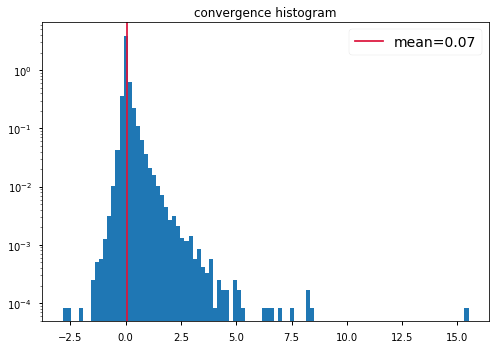

In [33]:
plt.figure()
plt.title('convergence histogram')
_ = plt.hist(mymap.value.flatten(), bins=100, density=True, log=True)
mean = np.mean(mymap)
plt.axvline(x=mean, color='crimson', label='mean=' + str(round(mean, 2)))
plt.legend(fontsize=14)
plt.show()

In [34]:
from matplotlib.colors import LogNorm

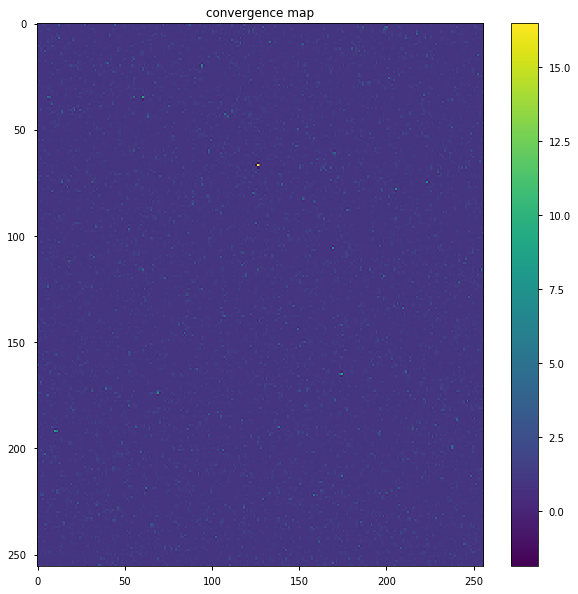

In [35]:
plt.figure(figsize=(10, 10))
plt.title('convergence map')
plt.imshow((mymap + 1), aspect='auto')
plt.colorbar()
plt.show()

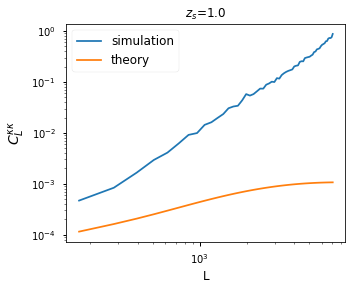

In [36]:
ll = len(my_run0.params['zs_source'])
plt.figure(figsize=(ll * 5, 4))
for ii, zs in enumerate(my_run0.params['zs_source']):
    plt.subplot(1, ll, ii + 1)
    plt.title('$z_s$=%.1f' % zs, fontsize=12)
    plt.loglog(my_run0.measured_cls[str(zs)]['L'],
               my_run0.measured_cls[str(zs)]['L']**2 *
               my_run0.measured_cls[str(zs)]['clkk'],
               label='simulation')
    plt.semilogx(my_run0.theory_cls[str(zs)]['L'],
                 my_run0.theory_cls[str(zs)]['L']**2 *
                 my_run0.theory_cls[str(zs)]['clkk'],
                 label='theory')
    plt.legend(fontsize=12)
    if ii == 0:
        plt.ylabel('$C_L^{\kappa \kappa}$', fontsize=14)
    plt.xlabel('L', fontsize=12)
# plt.xlim(200,10000)
# plt.ylim(1e-4,5e-3)